In [2]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('spam.csv', encoding_errors ='ignore')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

## Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# Drop last 3 columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
# Renaming Columns

df.rename(columns = {'v1': 'target', 'v2':'text'}, inplace= True)

In [15]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will _ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
# Duplicate Values
df.duplicated().sum()

404

In [23]:
df = df.drop_duplicates(keep = 'first')

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(5168, 2)

## Exploratory Data Analysis (EDA)

In [29]:
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [30]:
import matplotlib.pyplot as plt

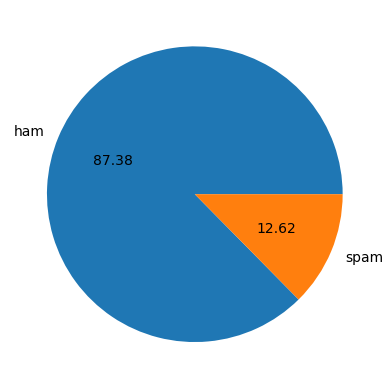

In [41]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct='%0.2f')
plt.show() ## Data is Imbalanced

In [39]:
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kamran\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [44]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Kamran\AppData\Local\Temp\ipykernel_35420\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [45]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159
5568,0,Will _ b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [49]:
  >>> import nltk
  >>> nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Kamran\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [52]:
# Number of Words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\Kamran\AppData\Local\Temp\ipykernel_35420\3424440533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [53]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35
5568,0,Will _ b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [56]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\Kamran\AppData\Local\Temp\ipykernel_35420\878202491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [57]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,0,Will _ b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [58]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000,5168.000000
mean,0.126161,78.759481,18.441176,1.966331
std,0.332063,58.104099,13.327587,1.449367
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,116.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [61]:
df[df['target'] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.344110,17.108946,1.819973
std,0.0,56.328803,13.494730,1.383228
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [63]:
df[df['target'] == 1].describe()

,target,num_characters,num_words,num_sentences
count,652.0,652.000000,652.000000,652.000000
mean,1.0,137.047546,27.668712,2.980061
std,0.0,29.937352,7.015283,1.491780
min,1.0,13.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,156.000000,32.000000,4.000000
max,1.0,222.000000,46.000000,9.000000


In [64]:
import seaborn as sns

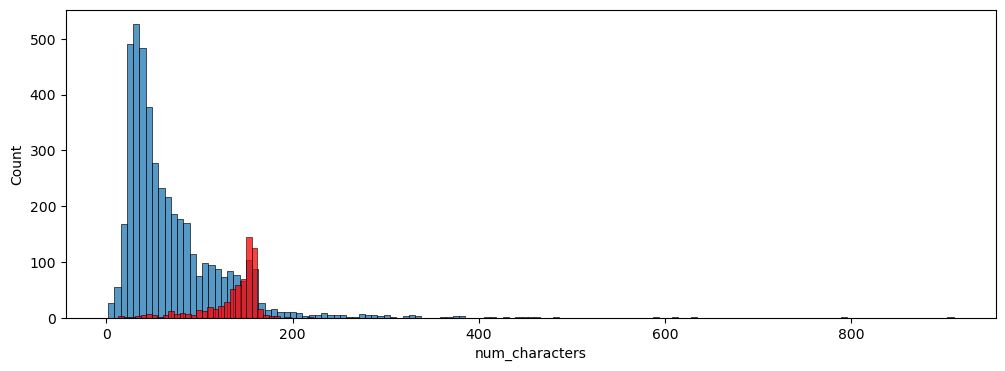

In [80]:
plt.figure(figsize = (12,4))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')
plt.show()

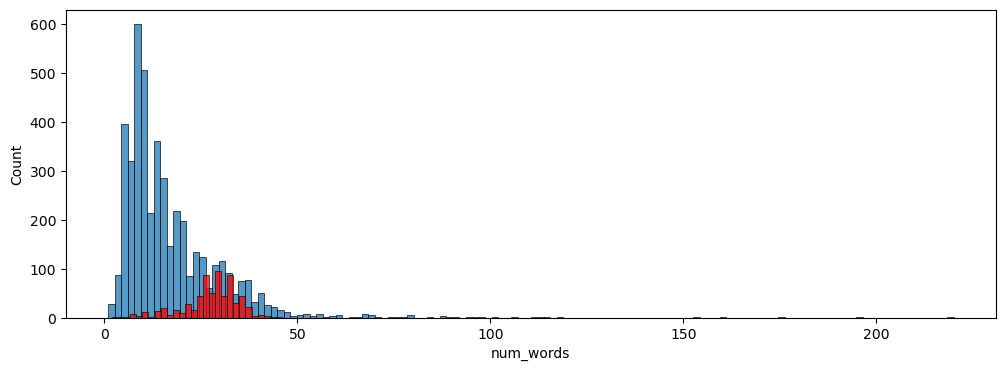

In [81]:
plt.figure(figsize = (12,4))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')
plt.show()

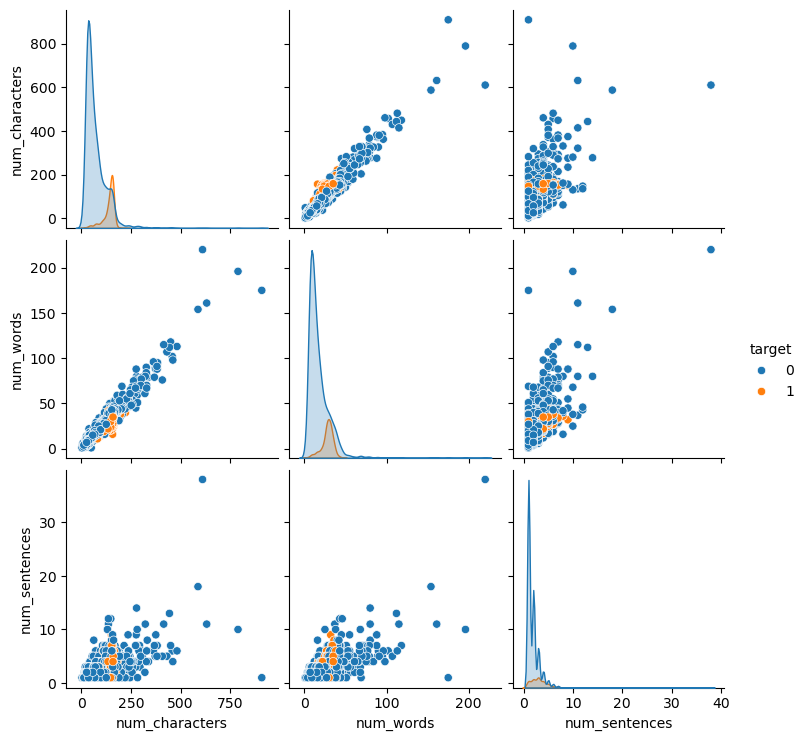

In [83]:
sns.pairplot(df, hue = 'target')
plt.show()

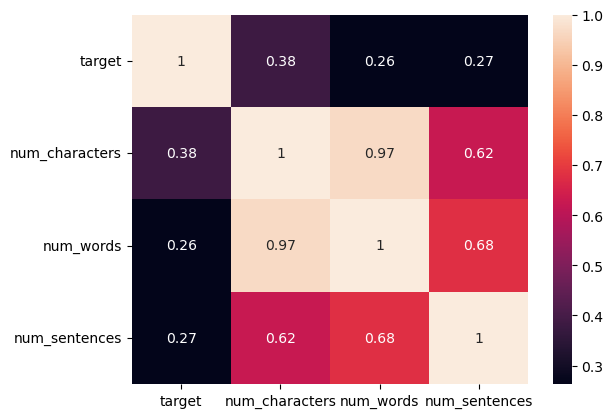

In [88]:
sns.heatmap(df.corr(numeric_only= True), annot= True)
plt.show()

## Data Preprocessing

#### Lower Case
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuation
#### Stemming

In [105]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kamran\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [106]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [107]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [114]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [116]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [120]:
df['transformedz_text'] =  df['text'].apply(transform_text)

C:\Users\Kamran\AppData\Local\Temp\ipykernel_35420\4294551428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformedz_text'] =  df['text'].apply(transform_text)


In [122]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformedz_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [126]:
pip install wordcloud


In [135]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black' )

In [136]:
spam_wc = wc.generate(df[df['target'] == 1]['transformedz_text'].str.cat(sep = " "))

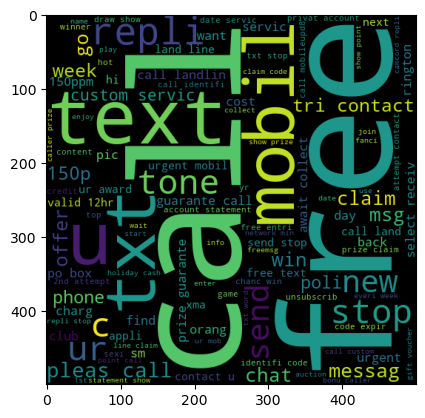

In [137]:
plt.imshow(spam_wc)

In [142]:
ham_wc = wc.generate(df[df['target'] == 0]['transformedz_text'].str.cat(sep = " "))

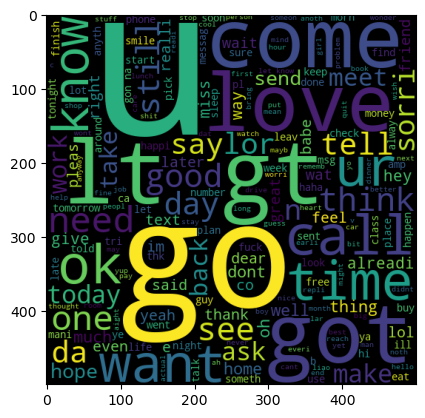

In [144]:
plt.imshow(ham_wc)

In [145]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformedz_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [150]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformedz_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [152]:
len(spam_corpus)

10106

In [175]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,102


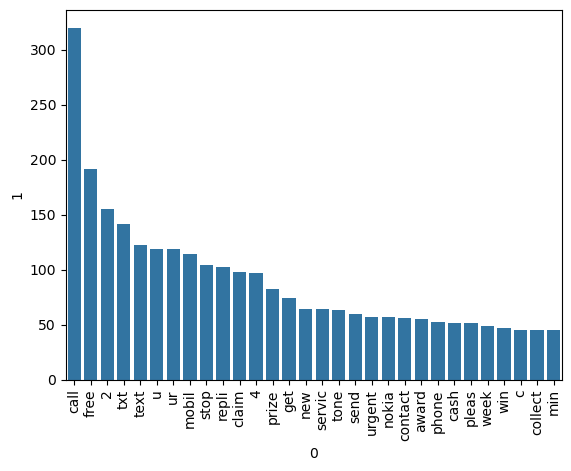

In [193]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [178]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformedz_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [179]:
len(ham_corpus)

35380

C:\Users\Kamran\AppData\Local\Temp\ipykernel_35420\1680915726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette= 'viridis')


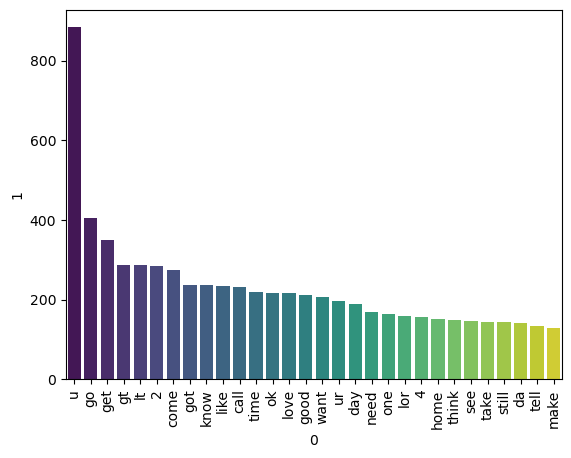

In [194]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette= 'viridis')
plt.xticks(rotation = 'vertical')
plt.show()

## Model Modelling

In [260]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [261]:
X = tfidf.fit_transform(df['transformedz_text']).toarray()

In [311]:
X.shape

(5168, 3000)

In [312]:
y = df['target'].values

In [313]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [316]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [317]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [318]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.879110251450677
[[787 106]
 [ 19 122]]
0.5350877192982456


In [319]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9816247582205029
[[890   3]
 [ 16 125]]
0.9765625


In [320]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [321]:
# tfidf ---> mnb

In [322]:
!pip install xgboost

In [323]:
# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [324]:
lrc = LogisticRegression(solver='liblinear', penalty= 'l1')
svc = SVC(kernel='sigmoid', gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators= 50, random_state = 2)
bc = BaggingClassifier(n_estimators=50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators= 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state= 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)


In [325]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [326]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [327]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.971953578336557, 0.9590163934426229)

In [328]:
from sklearn.metrics import accuracy_score, precision_score

# Ensure there are no naming conflicts
accuracy_scores_list = []  # Renamed to avoid conflict
precision_scores_list = []  # Renamed to avoid conflict

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Use scikit-learn accuracy_score and precision_score functions
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    # Append to renamed lists
    accuracy_scores_list.append(current_accuracy)
    precision_scores_list.append(current_precision)


For SVC
Accuracy -  0.971953578336557
Precision -  0.9590163934426229
For KN
Accuracy -  0.9003868471953579
Precision -  1.0
For NB
Accuracy -  0.9816247582205029
Precision -  0.9765625
For DT
Accuracy -  0.9284332688588007
Precision -  0.8602150537634409
For LR
Accuracy -  0.965183752417795
Precision -  0.9646017699115044
For RF
Accuracy -  0.9671179883945842
Precision -  0.9908256880733946


C:\Users\Kamran\anaconda3\anaconda_new\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9464285714285714
For BgC
Accuracy -  0.960348162475822
Precision -  0.8787878787878788
For ETC
Accuracy -  0.971953578336557
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9458413926499033
Precision -  0.9381443298969072
For xgb
Accuracy -  0.9680851063829787
Precision -  0.9655172413793104


In [329]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores_list, 'Precision': precision_scores_list}).sort_values('Precision',ascending= False)

In [330]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
5,RF,0.967118,0.990826
2,NB,0.981625,0.976562
8,ETC,0.971954,0.974576
10,xgb,0.968085,0.965517
4,LR,0.965184,0.964602
0,SVC,0.971954,0.959016
6,AdaBoost,0.960348,0.946429
9,GBDT,0.945841,0.938144
7,BgC,0.960348,0.878788


In [331]:
performance_df1 = pd.melt(performance_df, id_vars= 'Algorithm')

In [332]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,RF,Accuracy,0.967118
2,NB,Accuracy,0.981625
3,ETC,Accuracy,0.971954
4,xgb,Accuracy,0.968085
5,LR,Accuracy,0.965184
6,SVC,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.945841
9,BgC,Accuracy,0.960348


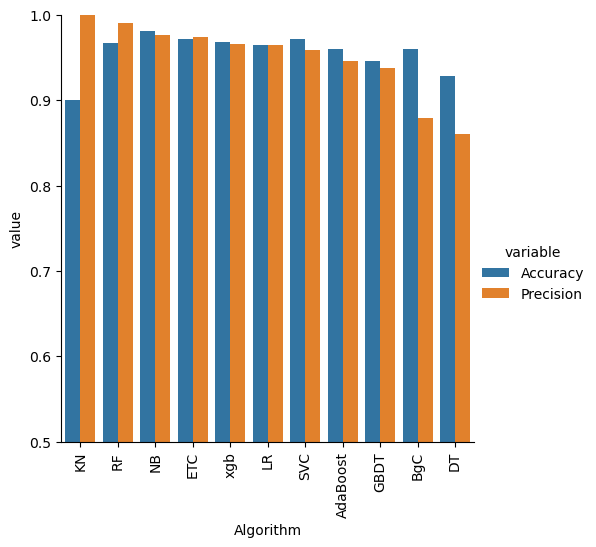

In [333]:
sns.catplot(x = 'Algorithm', y = 'value',hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

### Model Improvement

In [334]:
# 1. Change the max_features parameter of TfIdf

In [335]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))